In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

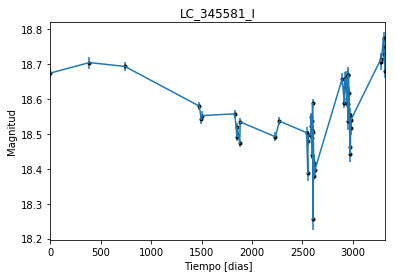

In [2]:
data = np.genfromtxt('LC_345581_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_345581_I')
plt.savefig("LC_345581_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

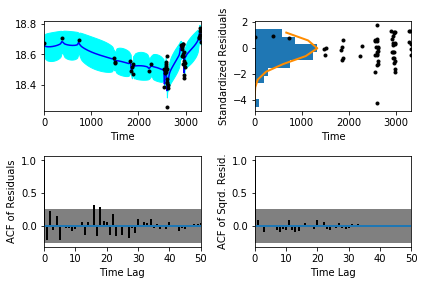

In [5]:
sample.assess_fit()

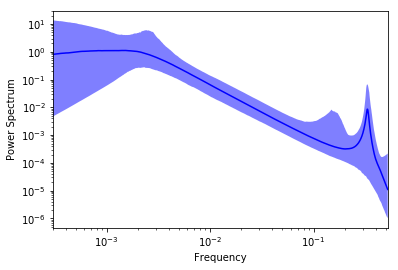

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

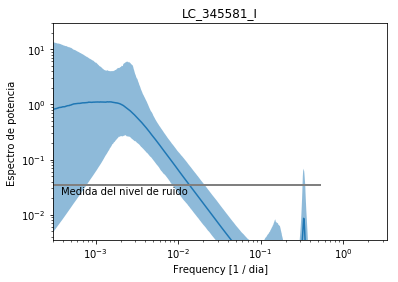

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_345581_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_345581_I')

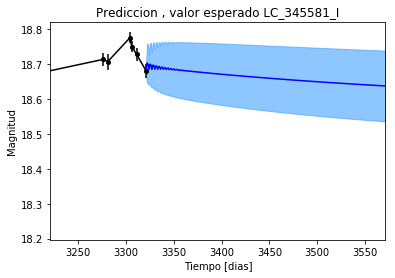

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_345581_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_345581_I')

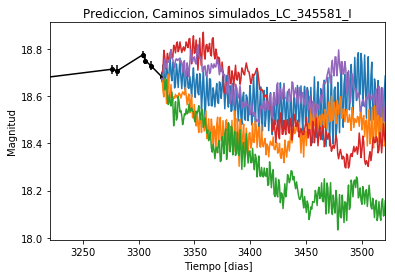

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_345581_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


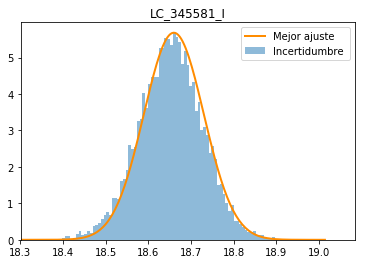

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_345581_I')
plt.savefig("Mejor_ajuste_LC_345581_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_345581_I')

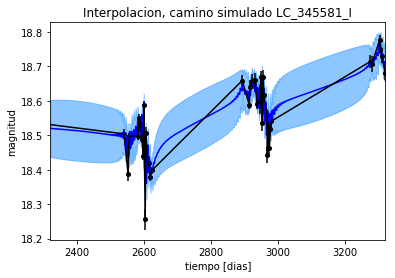

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_I')

Text(0.5,1,'Interpolacion, camino simulado LC_345581_I')

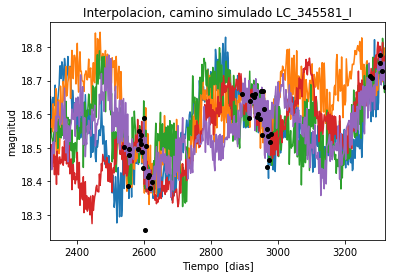

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 2461.70452943
Median: 0.00748883631167
Standard deviation: 0.0197409543971
68% credibility interval: [ 0.0041901   0.01289135]
95% credibility interval: [ 0.00221724  0.0247518 ]
99% credibility interval: [ 0.00143342  0.04899898]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 313.996836912
Median: 0.00748379596624
Standard deviation: 0.00739380424472
68% credibility interval: [ 0.00418709  0.01288475]
95% credibility interval: [ 0.00221441  0.0244966 ]
99% credibility interval: [ 0.00141636  0.04824382]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 173.279339559
Median: 0.00212732812908
Standard deviation: 0.341745434504


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 540.777929762
Median: 94.6143262933
Standard deviation: 2.08421108089
68% credibility interval: [ 92.2249457   96.19841292]
95% credibility interval: [ 89.28043932  97.18024212]
99% credibility interval: [ 86.7545319   97.65902301]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 160.285803513
Median: 0.189423115683
Standard deviation: 2.16105361883
68% credibility interval: [ 0.0870335   4.56485296]
95% credibility interval: [ 0.04955779  6.33815733]
99% credibility interval: [ 0.03448816  6.61028273]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 373.838401334
Median: 4.6360638814
Standard deviation: 7.60992602345
68% credibility interval: [  4.26337088  17.88929512]
95% credibility interval: [  1.60705305  2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1315.78211667
Median: 27293029248.2
Standard deviation: 8.83339717126e+75
68% credibility interval: [  7.99346560e-51   1.87893150e+43]
95% credibility interval: [  8.27867005e-87   1.47064084e+59]
99% credibility interval: [  1.16457495e-129   2.05522702e+074]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1290.67023204
Median: 18.5902407074
Standard deviation: 0.0380114582704
68% credibility interval: [ 18.55734021  18.62583563]
95% credibility interval: [ 18.51778529  18.6696401 ]
99% credibility interval: [ 18.48808657  18.71371022]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 429.314414381
Median: 0.336367028689
Standard deviation: 0.179999243667
68% credibility interval: [ 0.32613502  0.66999382]
95% credibility interval: [ 0.16177487  0.86450605]
99% credibility interval: [ 0.14316728  0.86946494]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 429.314414381
Median: 0.336367028689
Standard deviation: 0.179999243667
68% credibility interval: [ 0.32613502  0.66999382]
95% credibility interval: [ 0.16177487  0.86450605]
99% credibility interval: [ 0.14316728  0.86946494]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 287.943061363
Median: 0.0
Standard deviation: 0.00108969700082
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 540.777929762
Median: 94.6143262933
Standard deviation: 2.08421108089
68% credibility interval: [ 92.2249457   96.19841292]
95% credibility interval: [ 89.28043932  97.18024212]
99% credibility interval: [ 86.7545319   97.65902301]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 589.899929403
Median: 0.0135861198193
Standard deviation: 0.00789580589596
68% credibility interval: [ 0.00941783  0.0217078 ]
95% credibility interval: [ 0.00696829  0.03693506]
99% credibility interval: [ 0.00580722  0.05265432]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 861.326596126
Median: 1.23997634255
Standard deviation: 0.273214218293
68% credibility interval: [ 0.99751914  1.56139743]
95% credibility interval: [ 0.81884766  1.87224045]
99% credibility interval: [ 0.71719147  1.9605937 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 171.419696134
Median: 2.11766895849e-12
Standard deviation: 0.463506380382
68% credibility interval: [  6.97674626e-45   3.47843808e-01]
95% credibility interval: [  2.05813354e-60   1.77151303e+00]
99% credibility interval: [  6.56860367e-76   2.53849889e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 2461.70452943
Median: (-0.0470537462814-2.11307577079j)
Standard deviation: 1.13774994134
68% credibility interval: [-0.08099872-2.10985103j -0.02632720-2.12486025j]
95% credibility interval: [-0.15552012-2.16439172j -0.01393134-2.06058405j]
99% credibility interval: [-0.30786970-1.06743503j -0.00900642-2.05951821j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 313.996836912
Median: (-0.047022076857+2.1941028831j)
Standard deviation: 1.13192234753
68% credibility interval: [-0.08095729+2.37512883j -0.02630827+2.10841142j]
95% credibility interval: [-0.15391671+1.15316461j -0.01391357+2.05900327j]
99% credibility interval: [-0.30312485+0.8831364j  -0.00889928+4.26821834j]
Posterior summary for parameter ar_roots  elem